# Imports

At first use, if dreem isn't installed on your computer, open a terminal and enter the following command lines:
```
$ cd [YOUR PATH TO THIS NAP REPO]
$ cd libs
$ git clone https://github.com/jyesselm/dreem
```
Then import regular libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists
import os
from nap import *
try:
    sys.path.append(dirname('libs/dreem/dreem')) 
except:
    "If dreem isn't installed on your computer, the code won't run"

# Step 1.1: Data wrangling

### Resources used

Here, we will set the user name (at the moment, we'll call you Yves, it's a nice name). This is your main folder in the database. Check it by yourself [on the database!](https://console.firebase.google.com/u/0/project/dreem-542b7/database/dreem-542b7-default-rtdb/data)

The **tubes** that you chose here will be pulled from the database. Every tube correspond to a physical tube, also known as "experiment" during the wet lab part.  

The **constructs** are specific RNA sequences. They are referred to by their name, such as 8584 or 9572, and each tube has the same series of constructs.

A **study** is a group of tubes that are relevant to be studied together. For example, they are all replicates, or the salt concentration was increased along the tubes, etc.

The **pickles** are a dictionary of the tube's names and their respective path+title.

Set **switch_study** to True when you use another study for the first time. This will remove your former local json and download a new one from the Firebase.

In [7]:
## EDIT THIS ZONE 
user = 'Yves'
study = 'tutorial'  
switch_study = True
# END OF EDIT ZONE

## Database path
json_file = 'data/db.json'

## Constants
min_bases_cov = 1000 

tubes_per_study = {   'tutorial':['A6','D6'],
                      'replicates':['C5','A4' , 'F4', 'A6', 'A7'],
                      'salt': ['A6','B6','C6','D6','E6'], 
                      'temperature':['D7','E7','F7','G7','H7','A8','B8','C8'], 
                      'magnesium':['F6', 'G6', 'H6', 'A7', 'B7', 'C7'],
                      '60 mM DMS kinestics':['D8', 'E8', 'F8', 'G8', 'H8', 'A9']
                      }

tubes = tubes_per_study[study]

### Load the data

In [8]:
# If changed the data, remove the former dataset
if switch_study:
    os.remove(json_file)

# If not local copy of firebase, pull the firebase, else, load your copy
if not exists(json_file):
    if not exists('data'):
        os.mkdir('data')
    df_rough = data_wrangler.load_data_from_firebase(tubes=tubes, user=user)
    data_wrangler.dump_dict_json(JSONFileDict=json_file,
                                 df=df_rough)
else:
    df_rough = data_wrangler.load_dict_json(json_file)

No local file found, load data from Firebase
Re-used the previous firebase connection
A6 D6 Done!
Dumping df as a dict to a JSON file data/db.json
Done!


If everything is normal, so far, a json file was downloaded as `data/db.json`. Now, we'll extract two dataframes from this file, `df_full` for data quality analysis and `df` for data analysis. Check out the difference below.

### Clean and reformat the dataset. 
`df` is used for the analysis. Each of the construct have above 1000 reads for each tube.     
`df_full` is used for quality quality analysis. It has all constructs above 1000 valid reads for each tube individually.

In [9]:
df, df_full = turner_overthrow.clean_dataset(df_rough=df_rough,
                                             tubes=tubes, 
                                             min_bases_cov=min_bases_cov)

/home/ymdt/NAP/nap.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['tubes_covered'].loc[construct[1].index] = construct[1]['sequence'].count()


61 constructs were dropped because deltaG was 'void'
134 constructs have more than 1000 reads for each base of their var part on each tube


# Step 1.2: Data quality analysis

It's always hard to realize that you were analysing noise. Here, we'll get through a series a plot to check the data sanity.

### Show the tube's quantity of valid structures (good indicator of the tube's quality)

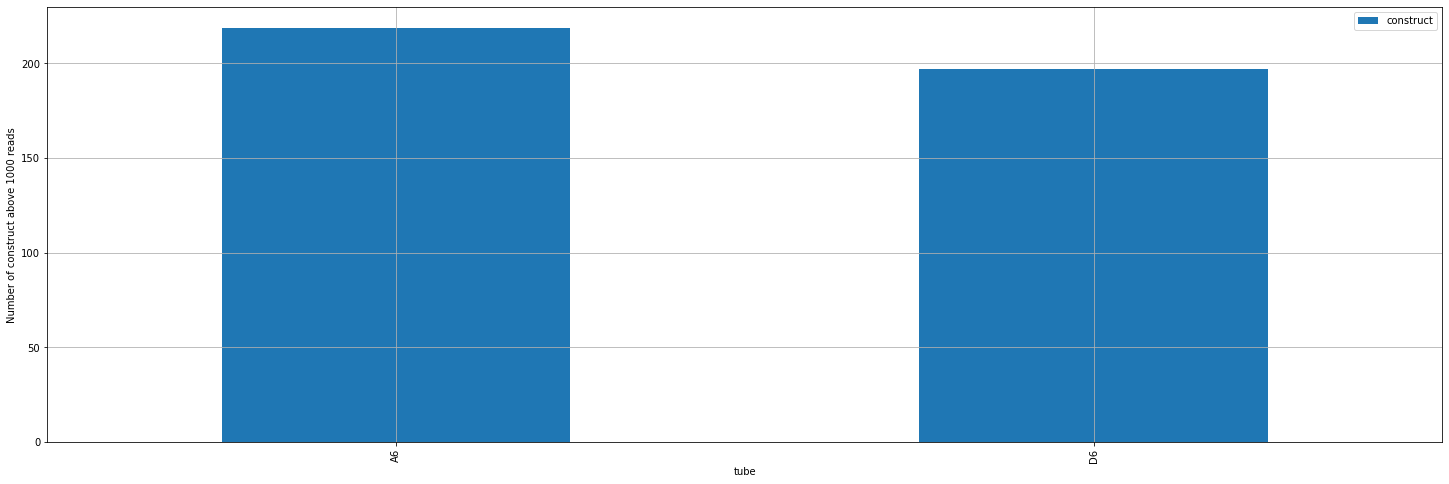

In [10]:
plot.valid_construct_per_tube(df=df_full,
                              min_bases_cov=min_bases_cov)

### Show the tube coverage distribution

In [ ]:
plot.tube_coverage_distribution(df=df_full)

### Plot the base coverage per construct distribution

In [ ]:
plot.base_coverage_for_all_constructs(df=df_full, 
                                      min_bases_cov=min_bases_cov)

### Sanity-check construct-wise base coverage plots
Plot randomly picked sequences to check the quality of the data.

In [ ]:
plot.random_base_coverage_plot_wise(df=df, 
                                    min_bases_cov=min_bases_cov)

### Heatmap of the var part coverage

In [ ]:
plot.heatmap(df = df, 
             column="cov_bases_var")

### Heatmap of the second half coverage

In [ ]:
plot.heatmap(df = df, 
                column="cov_bases_sec_half")

# Step 1.3: Your turn to play

These plots showed the tutorial study. You want to:
- Change the study to another study, such as `'temperature'`, and replot this test routine
- Write a new study called `'my_new_study'`, using the tubes `['C1','D5','E6','F7']`, and replot this data sanity test routine.

# Step 2: Data Analysis
In this part, we know that we read good data, and we want to read it through different plots. Let's get through these plots.

So far, we've seen that we analyse our data through tubes and constructs. Plot types will require either a (tube, construct) pair, either a given tube, either a given construct. For example, a deltaG plot is tube-wise, because it shows all of the constructs of a given tube. 

### Step 2.1: Get the list of tubes and constructs:

`tubes` comes from your previous study choice, and is the list of the tubes that you want to use.

`df.construct.unique()` gives you the list of constructs.

In [13]:
print(f"tubes are: {tubes}")
print(f"constructs are: {df.construct.unique()}")

tubes are: ['A6', 'D6']
constructs are: [  108   167   179   185   286   322   364   373   381   597   980  1009
  1055  1092  1120  1348  1495  1895  1994  2069  2093  2202  2221  2323
  2478  2506  2524  2570  2780  2797  2928  2936  3014  3163  3273  3337
  3580  3708  3723  3796  3925  3948  3987  4097  4274  4362  4493  4585
  4672  4708  4727  4758  5014  5269  5435  5440  5519  5689  5984  5988
  6317  6375  6458  6711  6896  7026  7172  7241  7261  7384  7487  7545
  7808  7845  7993  8106  8136  8240  8280  8281  8351  8369  8422  8427
  8430  8438  8574  8594  8613  8695  8735  8758  9176  9211  9237  9302
  9332  9489  9572  9629  9796  9832  9843  9849 10027 10044 10162 10166
 10190 10519 10663 10759 10803 10948 10992 11024 11035 11047 11197 11217
 11390 11499 11642 11659 11775 11825 11863 12079 12108 12281 12306 12320
 12361 12419]


### Step 2.2: Explore the data
`utils.get_var_info(df=df, tube=tube, construct=construct)` gives information about the variable part of a (tube, construct) pair.

Let's explore the data using the previous explored tubs and constructs lists.

In [11]:
# Select a (tube, construct) pair
tube = tubes[0] 
construct = df.construct.unique()[0]

utils.get_var_info(df=df, tube=tube, construct=construct).xs((True, '0'),level=('paired','var_structure_comparison'))

,,mut_rate,var_deltaG
base,index,,
G,80,0.001128,-9.4
C,81,0.003685,-9.4
A,82,0.003688,-9.4
C,83,0.001704,-9.4
A,84,0.004551,-9.4
T,85,0.000291,-9.4
G,86,0.000582,-9.4
C,88,0.003805,-9.4
A,89,0.01966,-9.4


### Step 2.3: DeltaG plots
Step 2.3.1: Let's start with a first plot, deltaG. DeltaG plots the mutation frequency of the paired bases of the variable part of each construct for a given tube. Give this function a tube and plot it! 

In [ ]:
plot.deltaG(df=df,
            tube= "EDIT ME")

Step 2.3.2: How about saving this plot directly to your files? Use the following code to save your plot to your files.

In [ ]:
tube = 'EDIT ME'

plot.deltaG(df=df, tube=tube)

plot.save_fig(path=f"data/figs/date/{study}/deltaG/", 
                title=f"deltaG_{tube}")

Step 2.3.3: Let's say that you want to save all of your tubes plots. Let's make a loop for that.

In [ ]:
for tube in tubes:
    plot.deltaG(df=df, tube=tube)

    plot.save_fig(path=f"data/figs/date/{study}/deltaG/", 
                  title=f"deltaG_{tube}")

Step 2.3.4: These plots are a bit overwhelming, right? Just close them right after saving them to your files.

In [ ]:
for tube in tubes:
    plot.deltaG(df=df, tube=tube)

    plot.save_fig(path=f"data/figs/date/{study}/deltaG/", 
                  title=f"deltaG_{tube}")

    plt.close()

It's been a long way together! Let's apply our new knowledge to another plot type.

### Step 2.4: Mutation sequence-wise

`plot.mutation_rate(df, tube, construct, plot_type, index, normalize)` plots the mutation rate base-wise for a given (tube construct) pair as a barplot. 
Arguments:
- `plot_type` :
    - `'sequence'` : each bar is colored w.r.t to the base of the original sequence.
    - `'partition'` : each bar shows the partition of into which bases this base mutates.
- `index`:
    - `'index'`: each base is identified with its position number
    - `'base'`: each base is identified with its type (A, C, G, T)

This plot type takes a (tube, construct) pair as an argument. That's fine, we know how to find our tubes list `tubes` and our construct list `df.construct.unique()`. 

Step 2.4.1: Let's do this plot:
- select a tube and a construct in your lists
- select `plot_type` : `'sequence'` and  `index`: `'index'`
- make the plot

Sequence type

In [ ]:
plot.mutation_rate(df=df,
                tube= "TO DO",
                construct="TO DO",
                plot_type="TO DO",
                index="TO DO")

Step 2.4.2: Now, use the following parameters:
- keep the same tube and construct
- select `plot_type` : `'sequence'` and  `index`: `'base'`
- make the plot
- what's the difference?

In [ ]:
plot.mutation_rate(df=df,
                tube= "TO DO",
                construct="TO DO",
                plot_type="TO DO",
                index="TO DO")

Step 2.4.3: Let's go for a last round. use the following parameters:
- keep the same tube and construct
- select `plot_type` : `'partition'` and  `index`: `'base'`
- make the plot
- what's the difference?

In [ ]:
plot.mutation_rate(df=df,
                tube= "TO DO",
                construct="TO DO",
                plot_type="TO DO",
                index="TO DO")

Step 2.4.4: Generate a lot of plots. 
- Pick your favorite plot type and paste it in the loop.
- Define the list of construct that you want to plot.
- Run your code
- Check your results in the folder `data/figs/date/{study}/mut_per_base/sequence/{construct}`

/!\ WARNING: it takes a few seconds to generate one plot. If you generate too many plots, like the entire `df.construct.unique()` list for all of the `tubes`, it will take a while (on my computer, it takes ~25 minutes). Select subsets of these lists instead. 

In [ ]:
constructs = ['TO DO']

for tube in tubes:
    for construct in constructs:
        # PASTE THE CODE FOR YOUR FAVORITE PLOT HERE
        plot.save_fig(path=f"data/figs/date/{study}/mut_per_base/sequence/{construct}/", 
                    title=f"base_per_base_sequence_{tube}_{construct}")
        plt.close()

### Step 2.5: Tubes comparison
This plot type is construct-wise. It compares the mutation rate of each base of this construct within the tube's list, 2 tubes by 2 tubes. The idea is to see the evolution of the data through the study.

Step 2.5.1: select a construct and plot this.

In [ ]:
plot.compare_n_tubes(df=df,
                     tubes = tubes,
                     construct= 'TODO')

Step 2.5.2: Publiposting
- Select mutltiple constructs
- Produce multiple plots
- Open the corresponding folder and check that it worked fine

/!\ WARNING: it takes a few seconds to generate one plot. If you generate too many plots, like the entire `df.construct.unique()` list, it will take a while (on my computer, it takes ~10 minutes). Select subsets of this list instead. 

In [ ]:
constructs = ['TO DO']

for construct in constructs:
        plot.compare_n_tubes(df, tubes, construct)
        plot.save_fig(path=f"data/figs/date/{study}/comparison/", 
                      title=f"comparison_{study}_{construct}")
        plt.close()
        print(construct, end=' ')

### Step 2.6: Save columns to a csv file

It can be useful to save relevant data from your dataset.

Step 2.6.1: Save columns to a csv file
- Set columns to `['tube', 'construct','full_sequence','var_sequence','mut_bases','info_bases']`
- Run the code
- Check the result

In [ ]:
utils.columns_to_csv(df=df,
                   tubes=tubes,
                   columns='TO DO',
                   title='about_{study}',
                   path='data/figs/date/{study}'
                   )

### Step 2.6.2: Save construct vs deltaG 

- Run the code
- Check the result

In [14]:
utils.deltaG_vs_construct_to_csv(df=df, title=f"deltaG_vs_construct.csv", path = f"data/figs/date", tubes=tubes)

# Step 3: Advanced data management

In this part, we will learn how to:
- Process pickle files, the output of DREEM
- Push to the database using your own username

# 